<a href="https://colab.research.google.com/github/sameer-karim/w207-final-project/blob/project/car_price_prediction_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data manipulation and numerical operations
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning and statistical models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from google.colab import drive
drive.mount('/content/drive')
from google.colab import drive
import pandas as pd
import pandas as pd
import numpy as np
from tabulate import tabulate
import re

Mounted at /content/drive


In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Path to your file
file_path = '/content/drive/My Drive/car_price_prediction.csv'

# Load the data into a DataFrame
df = pd.read_csv(file_path)

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [ ]:
#Data Preprocessing and Splits
#remove km and convert from string to int
df['Mileage'] = df['Mileage'].str.replace(' km', '').astype(int)

# Function to remove 'turbo' and convert to numeric
def clean_engine(value):
    if 'turbo' in value:
        value = value.replace(' turbo', '')
    return pd.to_numeric(value, errors='coerce')

# Apply the function to the 'Engine' column
df['Engine volume'] = df['Engine volume'].apply(clean_engine)

#convert doors from string to numeric
# Function to extract numbers from strings
def extract_numbers(column):
    return column.apply(lambda x: re.findall(r'\d+', x)[0])
#apply doors extraction function to column and re-type as a float
df['Doors'] = extract_numbers(df['Doors']).astype(float)

#NOTE THAT THERE ARE ALWAYS TAXES AND FEES SO WE NEED TO DISCUSS WHAT TO DO WITH THIS COLUMN WHEN 0 OR JUST LEAVE IT AND CALL IT OUT IN PRESENTATION
# Replace non-numeric values (e.g., '-') for the Levy Column - the Levy column is taxes and fees upon purchase
df.replace('-', 0, inplace=True)


# Convert appropriate columns to numeric types (assuming these columns are supposed to be numeric)
#['ID', 'Levy','Price', 'Prod. year', 'Cylinders', 'Airbags','Engine volume', 'Mileage','Doors']
columns_to_convert=['ID', 'Levy','Price', 'Prod. year', 'Cylinders', 'Airbags','Engine volume', 'Mileage','Doors']

for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column])

# Drop rows with missing values - there are none but we can leave this here anyway
df.dropna(inplace=True)

# Calculate car age
df['car_age'] = 2024 - df['Prod. year']
#drop prod year - optional
#df = df.drop(columns=['Prod. year'])

# Mileage per year
df['mileage_per_year'] = df['Mileage'] / df['car_age']

#drive train rename
df['Drive wheels'] = df['Drive wheels'].replace('4x4', '4WD')

#Split labels
column_names_list = list(df.columns)
column_names_list.remove('Price')
X_train=df[column_names_list]
Y_train=df['Price']

# Split the data into training and validation sets 60/20/20
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [ ]:
X_train.dtypes

ID                    int64
Levy                  int64
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume       float64
Mileage               int64
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors               float64
Wheel                object
Color                object
Airbags               int64
car_age               int64
mileage_per_year    float64
dtype: object

In [ ]:
# Get the summary statistics
summary = df.describe().round(2)

# Create a list of the headers and rows
headers = summary.columns.tolist()
rows = summary.reset_index().values.tolist()

# Print the formatted table
print(tabulate(rows, headers=headers, tablefmt='pretty'))

+-------+-------------+------------+---------+------------+---------------+--------------+-----------+---------+---------+---------+------------------+
|       |     ID      |   Price    |  Levy   | Prod. year | Engine volume |   Mileage    | Cylinders |  Doors  | Airbags | car_age | mileage_per_year |
+-------+-------------+------------+---------+------------+---------------+--------------+-----------+---------+---------+---------+------------------+
| count |   17306.0   |  17306.0   | 17306.0 |  17306.0   |    17306.0    |   17306.0    |  17306.0  | 17306.0 | 17306.0 | 17306.0 |     17306.0      |
| mean  | 45600220.25 |  17449.61  | 664.13  |  2011.06   |     2.31      |  1556668.76  |   4.57    |  3.94   |  6.49   |  12.94  |     73502.83     |
|  std  |  880143.68  | 200619.25  |  567.5  |    5.64    |     0.89      | 48346103.31  |   1.18    |  0.37   |  4.33   |  5.64   |    2165235.89    |
|  min  | 20746880.0  |    1.0     |   0.0   |   1939.0   |      0.0      |     0.0     

In [ ]:
print(df.head(5))



         ID  Price  Levy Manufacturer     Model   Category Leather interior  \
0  45654403  13328  1399        LEXUS    RX 450       Jeep              Yes   
1  44731507  16621  1018    CHEVROLET   Equinox       Jeep               No   
3  45769185   3607   862         FORD    Escape       Jeep              Yes   
4  45809263  11726   446        HONDA       FIT  Hatchback              Yes   
5  45802912  39493   891      HYUNDAI  Santa FE       Jeep              Yes   

  Fuel type  Engine volume  Cylinders Gear box type Drive wheels  Doors  \
0    Hybrid            3.5        6.0     Automatic          4WD    4.0   
1    Petrol            3.0        6.0     Tiptronic          4WD    4.0   
3    Hybrid            2.5        4.0     Automatic          4WD    4.0   
4    Petrol            1.3        4.0     Automatic        Front    4.0   
5    Diesel            2.0        4.0     Automatic        Front    4.0   

        Wheel   Color  Airbags  car_age  mileage_per_year  
0  Left wheel 

In [ ]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['float64','int64']).columns
print(numerical_columns)
print(df.columns)

Index(['ID', 'Price', 'Levy', 'Engine volume', 'Mileage', 'Cylinders', 'Doors',
       'Airbags', 'car_age', 'mileage_per_year'],
      dtype='object')
Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'car_age', 'mileage_per_year'],
      dtype='object')


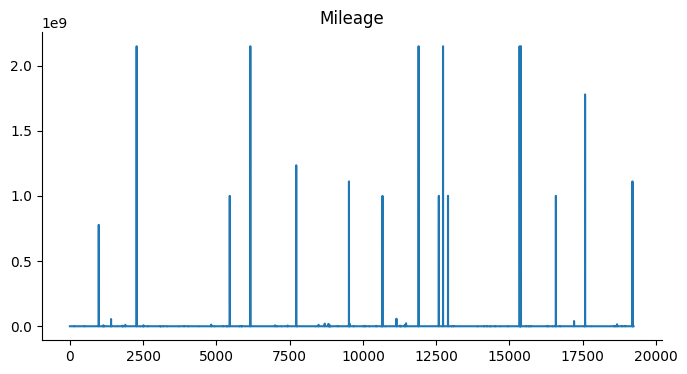

In [ ]:
df['Mileage'].plot(kind='line', figsize=(8, 4), title='Mileage')
plt.gca().spines[['top', 'right']].set_visible(False)

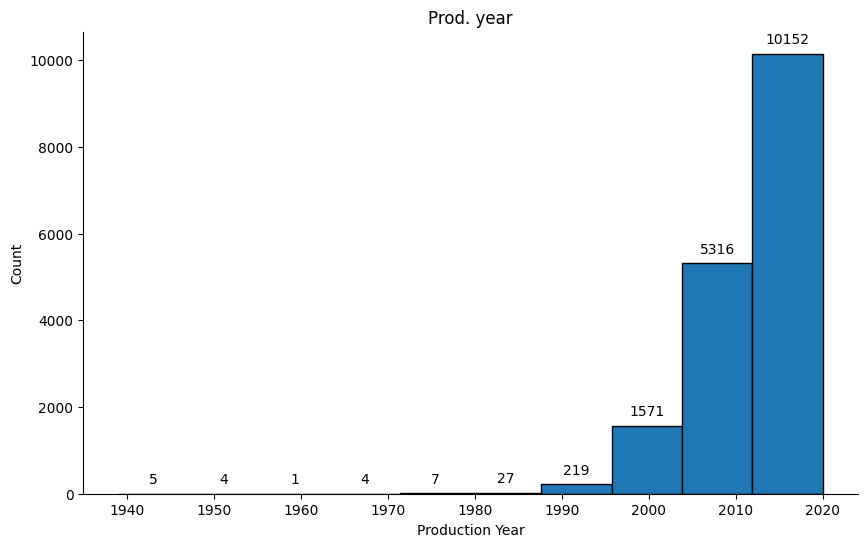

In [ ]:
from matplotlib import pyplot as plt

# Plot the histogram
plt.figure(figsize=(10, 6))
hist = df['Prod. year'].plot(kind='hist', bins=10, title='Prod. year', edgecolor='black')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Production Year')
plt.ylabel('Count')

for p in hist.patches:
    height = p.get_height()
    plt.annotate(f'{int(height)}', xy=(p.get_x() + p.get_width() / 2, height),
                 xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

plt.show()

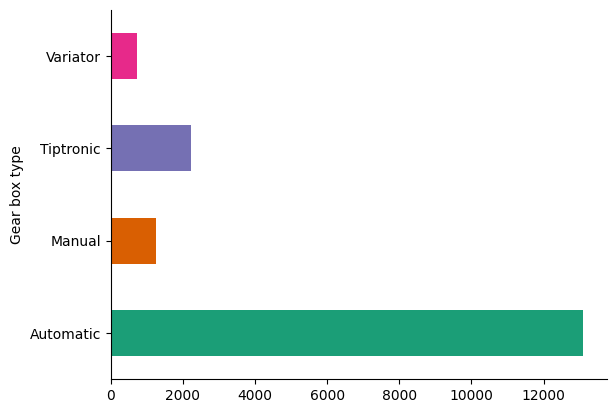

In [ ]:
# Gear box type
import seaborn as sns
df.groupby('Gear box type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

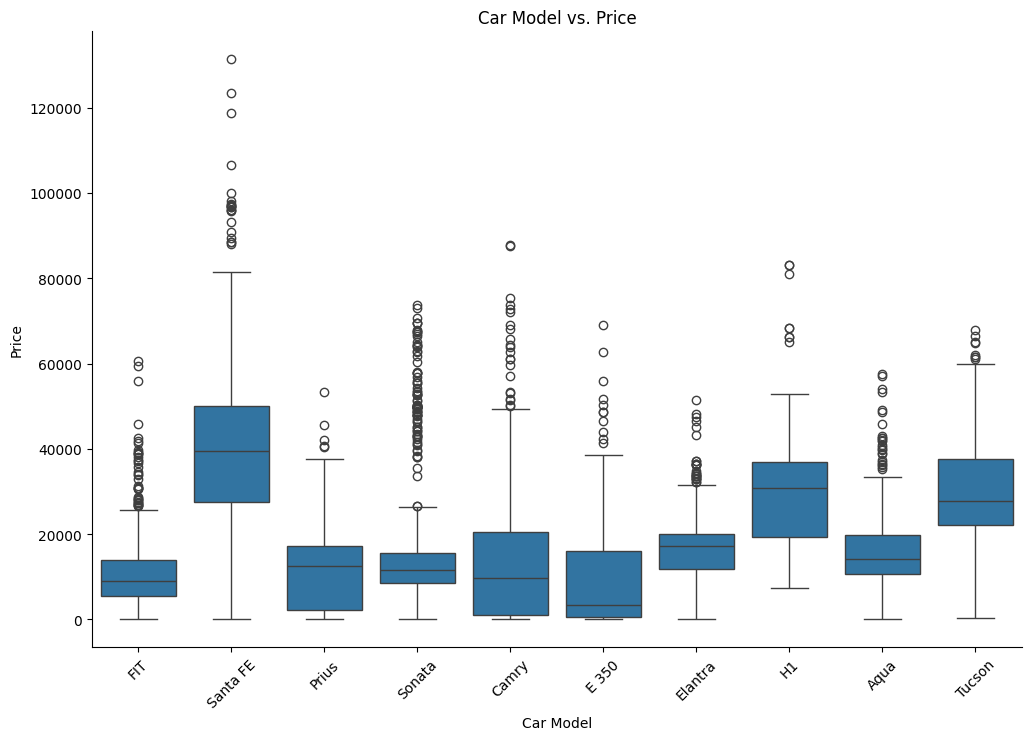

In [ ]:
# Limit the number of car models shown (optional)
top_models = df['Model'].value_counts().nlargest(10).index
filtered_df = df[df['Model'].isin(top_models)]

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Model', y='Price', data=filtered_df)
plt.title('Car Model vs. Price')
plt.xlabel('Car Model')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

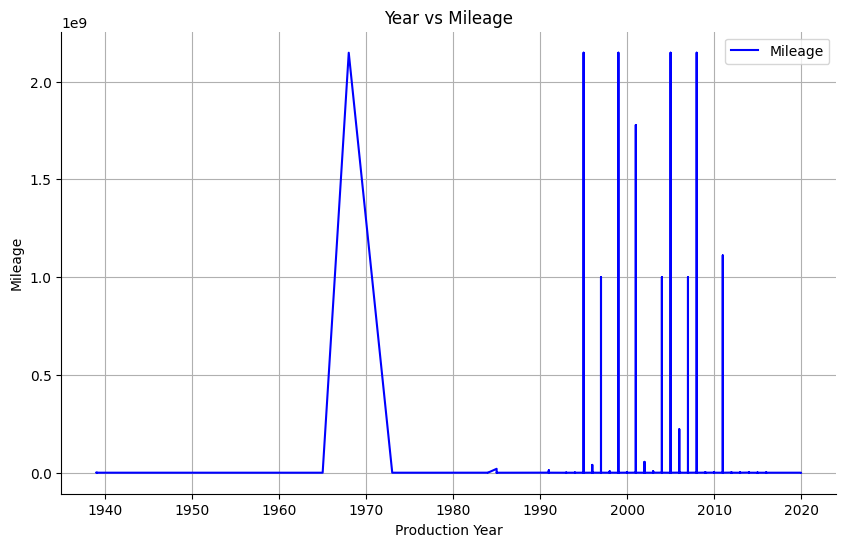

In [ ]:
# Sort the dataframe by 'Prod. year' to plot the lines correctly
df = df.sort_values('Prod. year')

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(df['Prod. year'], df['Mileage'], color='blue', label='Mileage')
plt.xlabel('Production Year')
plt.ylabel('Mileage')
plt.title('Year vs Mileage')
plt.gca().spines[['top', 'right']].set_visible(False)

# Add grid and legend
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Define the range of mileage values to plot (adjust as needed)
mileage_range = (0, 500000)  # Example: focusing on mileage values between 0 and 300,000 km

# Plot the histogram with specified range and adjusted bins
plt.figure(figsize=(10, 6))
plt.hist(df['Mileage'], bins=50, range=mileage_range, edgecolor='black')  # Adjust bins and range
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.title('Distribution of Mileage')
plt.grid(True)
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

In [ ]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Prod. year'], df['Price'], alpha=0.5, edgecolor='black')
plt.xlabel('Production Year')
plt.ylabel('Price')
plt.title('Production Year vs. Price')
plt.grid(True)
plt.gca().spines[['top', 'right']].set_visible(False)

# Set the y-axis range
plt.ylim(0, 300000)

plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Mileage'], df['Price'], alpha=0.5, edgecolor='black')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs. Price')
plt.grid(True)
plt.gca().spines[['top', 'right']].set_visible(False)

# Set the y-axis range
plt.xlim(0, 1000000)
plt.ylim(0, 200000)

plt.show()

In [ ]:
print(X_train.shape)
print(X_train.dtypes)

(10383, 17)
ID                    int64
Levy                  int64
Manufacturer         object
Model                object
Category             object
Leather interior     object
Fuel type            object
Engine volume       float64
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors               float64
Wheel                object
Color                object
Airbags               int64
car_age               int64
mileage_per_year    float64
dtype: object


In [ ]:
#baseline model - linear regression, no feature engineering and evaluated using MAPE

#Choose features to include in baseline model
baseline_features=['Mileage','car_age','Cylinders','Engine volume']

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#Baseline model - no gradient descent - OLS regression
model = LinearRegression()
model.fit(X_train[baseline_features], y_train)

# Make predictions
y_pred = model.predict(X_test[baseline_features])

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MAPE: {mape:.2f}%')

MAPE: 2306.96%


In [ ]:
X_train[baseline_features].shape

(10383, 4)

In [ ]:
y_train.shape

(10383,)

In [ ]:
# Logistic Regression with MAPE as metric
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='relu', input_dim=len(baseline_features))
])

# Compile the model with MAPE as a metric
model1.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=[tf.keras.metrics.MeanAbsolutePercentageError()])

#train model1
history = model1.fit(X_train[baseline_features], y_train, validation_split=0.2, epochs=10, batch_size=32)

#this model basically predicts everything wrong

Epoch 1/10
260/260 [==============================] - 3s 7ms/step - loss: 83930841088.0000 - mean_absolute_percentage_error: 99.8420 - val_loss: 533965440.0000 - val_mean_absolute_percentage_error: 99.8183
Epoch 2/10
260/260 [==============================] - 1s 5ms/step - loss: 83930849280.0000 - mean_absolute_percentage_error: 99.7999 - val_loss: 533963840.0000 - val_mean_absolute_percentage_error: 99.7887
Epoch 3/10
260/260 [==============================] - 1s 6ms/step - loss: 83930824704.0000 - mean_absolute_percentage_error: 99.7719 - val_loss: 533962400.0000 - val_mean_absolute_percentage_error: 99.7606
Epoch 4/10
260/260 [==============================] - 1s 4ms/step - loss: 83930841088.0000 - mean_absolute_percentage_error: 99.7430 - val_loss: 533960896.0000 - val_mean_absolute_percentage_error: 99.7324
Epoch 5/10
260/260 [==============================] - 1s 4ms/step - loss: 83930808320.0000 - mean_absolute_percentage_error: 99.7235 - val_loss: 533959232.0000 - val_mean_absol

In [ ]:
# Evaluate the model on test data
test_loss, test_mape = model1.evaluate(X_test[baseline_features], y_test)

# Print the results
print(f'Test Loss: {test_loss}')
print(f'Test MAPE: {test_mape}')

#poor performance

109/109 [==============================] - 0s 4ms/step - loss: 526470752.0000 - mean_absolute_percentage_error: 99.6999
Test Loss: 526470752.0
Test MAPE: 99.69985961914062


In [ ]:
# Extract weights from the model
weights = model1.get_weights()

# Get the feature names (assuming baseline_features is a list of feature names)
feature_names = baseline_features

# The first element in weights is the array of weights for the input layer
input_weights = weights[0]

# Create a dictionary to map features to their corresponding weights
feature_weights = {feature: weight[0] for feature, weight in zip(feature_names, input_weights)}

# Print the feature weights
print("Feature weights:")
for feature, weight in feature_weights.items():
    print(f"{feature}: {weight}")

#The mileage has a negative relationship with price, that makes sense.
#The age of the car has a positive relationship with price which does not make sense - maybe we need to train for more epochs since we have not reached convergence
#Cylinders increases price which makes sense
#engine volume increases price which makes sense

Feature weights:
Mileage: -0.2542699873447418
car_age: 1.847560167312622
Cylinders: 2.0916988849639893
Engine volume: 0.7397979497909546


In [ ]:
numerical_features=X_train.select_dtypes(include=['number']).columns.tolist()

In [ ]:
X_train[numerical_features].shape

(10383, 10)

In [ ]:
#baseline model 2 - all numerical features

# Logistic Regression with MAPE as metric
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='relu', input_dim=len(numerical_features))
])

# Compile the model with MAPE as a metric
model2.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=[tf.keras.metrics.MeanAbsolutePercentageError()])

#train model1
history = model2.fit(X_train[numerical_features], y_train, validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
260/260 [==============================] - 3s 7ms/step - loss: 172832822657024.0000 - mean_absolute_percentage_error: 1694625.5000 - val_loss: 66343017644032.0000 - val_mean_absolute_percentage_error: 878003.5625
Epoch 2/10
260/260 [==============================] - 2s 6ms/step - loss: 28015356542976.0000 - mean_absolute_percentage_error: 626344.3125 - val_loss: 6849622441984.0000 - val_mean_absolute_percentage_error: 283906.9375
Epoch 3/10
260/260 [==============================] - 2s 7ms/step - loss: 2351532867584.0000 - mean_absolute_percentage_error: 175708.5625 - val_loss: 322323382272.0000 - val_mean_absolute_percentage_error: 62844.9375
Epoch 4/10
260/260 [==============================] - 2s 7ms/step - loss: 173067976704.0000 - mean_absolute_percentage_error: 33223.4688 - val_loss: 12537906176.0000 - val_mean_absolute_percentage_error: 11621.3652
Epoch 5/10
260/260 [==============================] - 1s 4ms/step - loss: 88074264576.0000 - mean_absolute_percentage_erro

In [ ]:
# Evaluate the model on test data
test_loss, test_mape = model2.evaluate(X_test[numerical_features], y_test)

# Print the results
print(f'Test Loss: {test_loss}')
print(f'Test MAPE: {test_mape}')

#worse performance than model 1

109/109 [==============================] - 0s 3ms/step - loss: 543770432.0000 - mean_absolute_percentage_error: 1129.3768
Test Loss: 543770432.0
Test MAPE: 1129.3768310546875


In [ ]:
X_train.dtypes

ID                    int64
Levy                  int64
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume       float64
Mileage               int64
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors               float64
Wheel                object
Color                object
Airbags               int64
car_age               int64
mileage_per_year    float64
dtype: object

In [ ]:
from sklearn.preprocessing import OneHotEncoder
#test for one-hot function
encoder=OneHotEncoder(sparse=False)
column_to_encode=X_train[['Manufacturer']]
encoded_data = encoder.fit_transform(column_to_encode)
print(encoded_data)
print(max(encoded_data[0]))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
1.0


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
num_of_one_hot=0
for column in X_train.columns:
    if X_train[column].dtype == 'object':
      num_of_one_hot+=X_train[column].nunique()
print(len(X_train[numerical_features].columns)+num_of_one_hot)

#this is how many features there should be after one hot encoding - 1072 columns

1072


In [ ]:
import warnings
#feature engineering part 1 - categorical to one-hot and Z-scale numericals
from sklearn.preprocessing import OneHotEncoder

#handle categorical variables, one hot encode categorical variables
def categorical(data):
    encoder = OneHotEncoder(sparse=False)
    for column in data.columns:
        if data[column].dtype == 'object':
            column_to_encode = data[[column]]
            encoded_data = encoder.fit_transform(column_to_encode)
            encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out([column]))
            data = data.drop(column, axis=1)  # Drop the original column
            data = pd.concat([data, encoded_df], axis=1)  # Concatenate the new encoded columns
    return data

# Suppress FutureWarnings - otherwise a bunch of warnings will be output
warnings.simplefilter(action='ignore', category=FutureWarning)

#Note that all dtypes for features are numerical except the categorical features which are objects, this means the function should work
X_train=categorical(X_train)
X_test=categorical(X_test)
X_val=categorical(X_val)


In [ ]:
#check to make sure the number of features matches the check above - 1072 features expected
print(X_train.shape[1])

1080


In [ ]:
#PAUSE HERE - MEET WITH GROUP

#Scale numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train[numerical_columns])
X_test_scaled=scaler.transform(X_test[numerical_columns])
X_val_scaled=scaler.transform(X_val[numerical_columns])

In [ ]:
#Test Model 2 with numerical features and one-hot encoding
model2 = LinearRegression()
model2.fit(X_train_scaled, y_train)

# Make predictions
y_pred2 = model.predict(X_test)

# Calculate MAPE
mape2 = mean_absolute_percentage_error(y_test, y_pred2)

print(f'MAPE: {mape2:.2f}%')

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# Identify numerical columns
numerical_columns = X_train.select_dtypes(include=['float64']).columns

# Remove 'ID' from numerical columns if present
numerical_columns = numerical_columns.drop('ID', errors='ignore')
numerical_columns

Index(['Levy', 'Engine volume', 'Cylinders', 'Doors', 'Airbags', 'car_age',
       'mileage_per_year', 'Manufacturer_ACURA', 'Manufacturer_ALFA ROMEO',
       'Manufacturer_ASTON MARTIN',
       ...
       'Color_Grey', 'Color_Orange', 'Color_Pink', 'Color_Purple', 'Color_Red',
       'Color_Silver', 'Color_Sky blue', 'Color_White', 'Color_Yellow',
       'Color_nan'],
      dtype='object', length=1077)

In [ ]:
#consider non-linearity - certain features may not have a linear relationship with price

#consider feature interaction - for example horsepower on its own may not predict price but maybe a low horsepower Porsche is more expensive because it is a vintage car and that makes it more valuable

#Use Kaggle to determine baseline models
#like for titanic - predicting all dead, predicting males die based on Leaderboard in Kaggle). Otherwise just use a couple key features in the regression instead of using all features.
#For model1 use one feature, logistic regression, and Adam optimizer - variant of SGD that has momentum so we dont get stuck at a local minimum

#for baseline model - maybe we need to train for more epochs since we have not reached convergence, not sure if this is a best practice

